Load Clustering Using K-Means Algorithm
(Note: Meter data needs to be imported prior to clustering.)

In [1]:
import os, sys
PWD = os.getenv('PWD')
os.chdir(PWD)
sys.path.insert(0, os.getenv('PWD'))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")
import django
django.setup()

In [2]:
from beo_datastore.libs.intervalframe import ValidationFrame288
from beo_datastore.libs.plot_intervalframe import plot_frame288, plot_many_frame288s

from load.customer.models import Meter, CustomerPopulation
from reference.reference_model.models import LoadServingEntity

In [3]:
# Configure Clustering

# Create Clusters using MCE meters
load_serving_entity = LoadServingEntity.objects.get(name__contains="MCE")
meters = Meter.objects.filter(load_serving_entity=load_serving_entity, rate_plan_name__contains="ETOUA")
number_of_clusters = 6

# choices are "average_frame288", "minimum_frame288", "maximum_frame288", "total_frame288", "count_frame288"
frame288_type = "average_frame288"
normalize = False  # to normalize to -1 to 1 range

# run K-Means clustering algorithm
customer_population = CustomerPopulation.generate(
    load_serving_entity=load_serving_entity,
    meters=meters,
    frame288_type=frame288_type,
    number_of_clusters=number_of_clusters,
    normalize=normalize
)

number of meters: 819


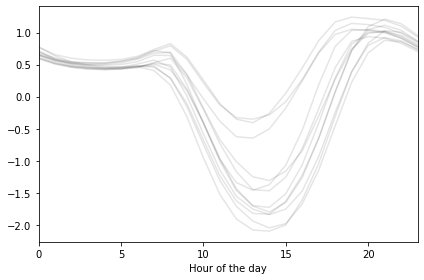

number of meters: 560


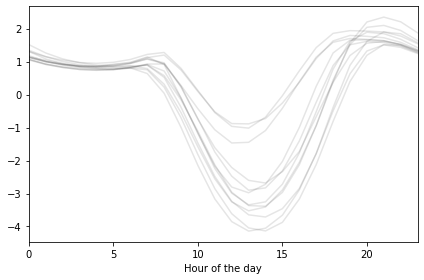

number of meters: 4


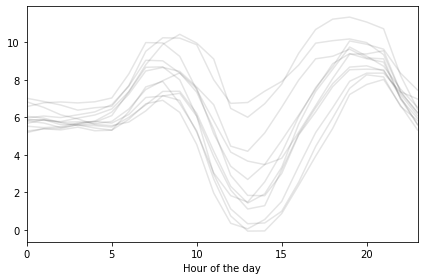

number of meters: 2


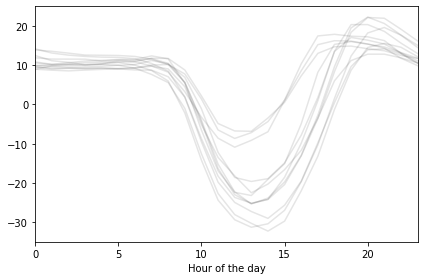

number of meters: 242


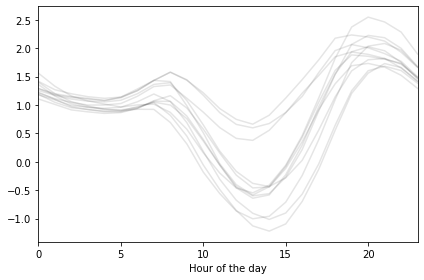

number of meters: 102


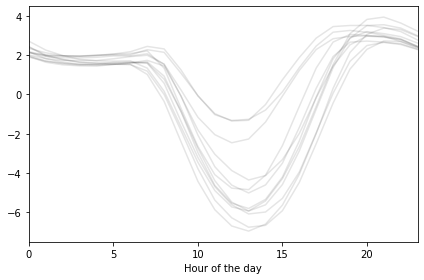

In [4]:
# plot reference load cluster

for customer_cluster in customer_population.customer_clusters.all():
    print("number of meters: {}".format(customer_cluster.number_of_meters))
    plot_frame288(customer_cluster.frame288)